# Multiple Linear Regression

## Bike sharing assignment

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing the necessary packages

In [1]:
#To supress the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np  #for numerical/matrix operations
import pandas as pd  #for file related operations
import matplotlib.pyplot as plt  #for data visualisation
import seaborn as sns  #for data visualisation
%matplotlib inline  

### Read and understand the file

In [4]:
df = pd.DataFrame(pd.read_csv("day.csv"))  #read the csv file

In [5]:
df.head()  #check the top 5 elements in the dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape  #check the dimensions of the dataset

(730, 16)

In [8]:
df.info()  #check the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Check for missing and duplicate values

In [10]:
df.isnull().sum()  #number of null values present in each column

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df_duplicate = df.copy()

df_duplicate.drop_duplicates(subset=None, inplace=True)  #check for duplicates and dropping the entire duplicate row

In [12]:
#comparing the shapes

print(df.shape)  
print(df_duplicate.shape) 

(730, 16)
(730, 16)


#####  Comment

- The shape after running the drop duplicate is same as the original dataframe.

- Therefore, we can conclude that there were no duplicate values in the dataset.

### Checking for irrelevant columns and removing 

On carefully observing the data and the data dictionary, we can reomve the following from further analysis:

- **instant** : index value, no prominence associated

- **dteday** : This is a date column, as we already have seperate columns for 'year' & 'month', the date is no longer required.

- **casual** & **registered** : These columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new changes in df_new, as the original dataset is kept for future analysis

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
#dropping the columns mentioned above

In [16]:
df_new.shape

(730, 12)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Data visualisation

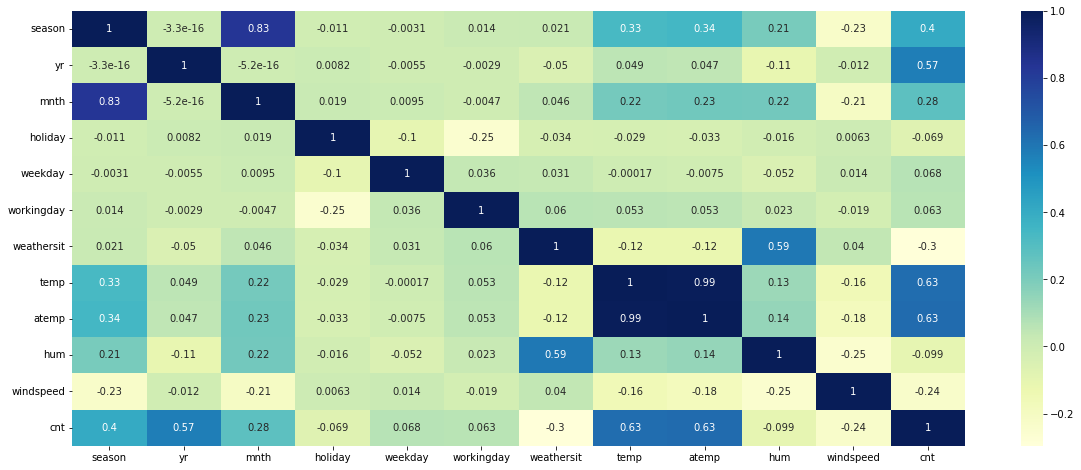

In [19]:
#Plotting a heatmap to find the correlations between different variables

plt.figure(figsize=[20,8])
sns.heatmap(df_new.corr(),cmap="YlGnBu", annot=True)
plt.show()

#### Comment

- windspeed & holiday & weathersit & hum: is negatively correlated with cnt
- temp & atemp has the highest correlation with cnt
- yr, month & season are positively correlated with the cnt


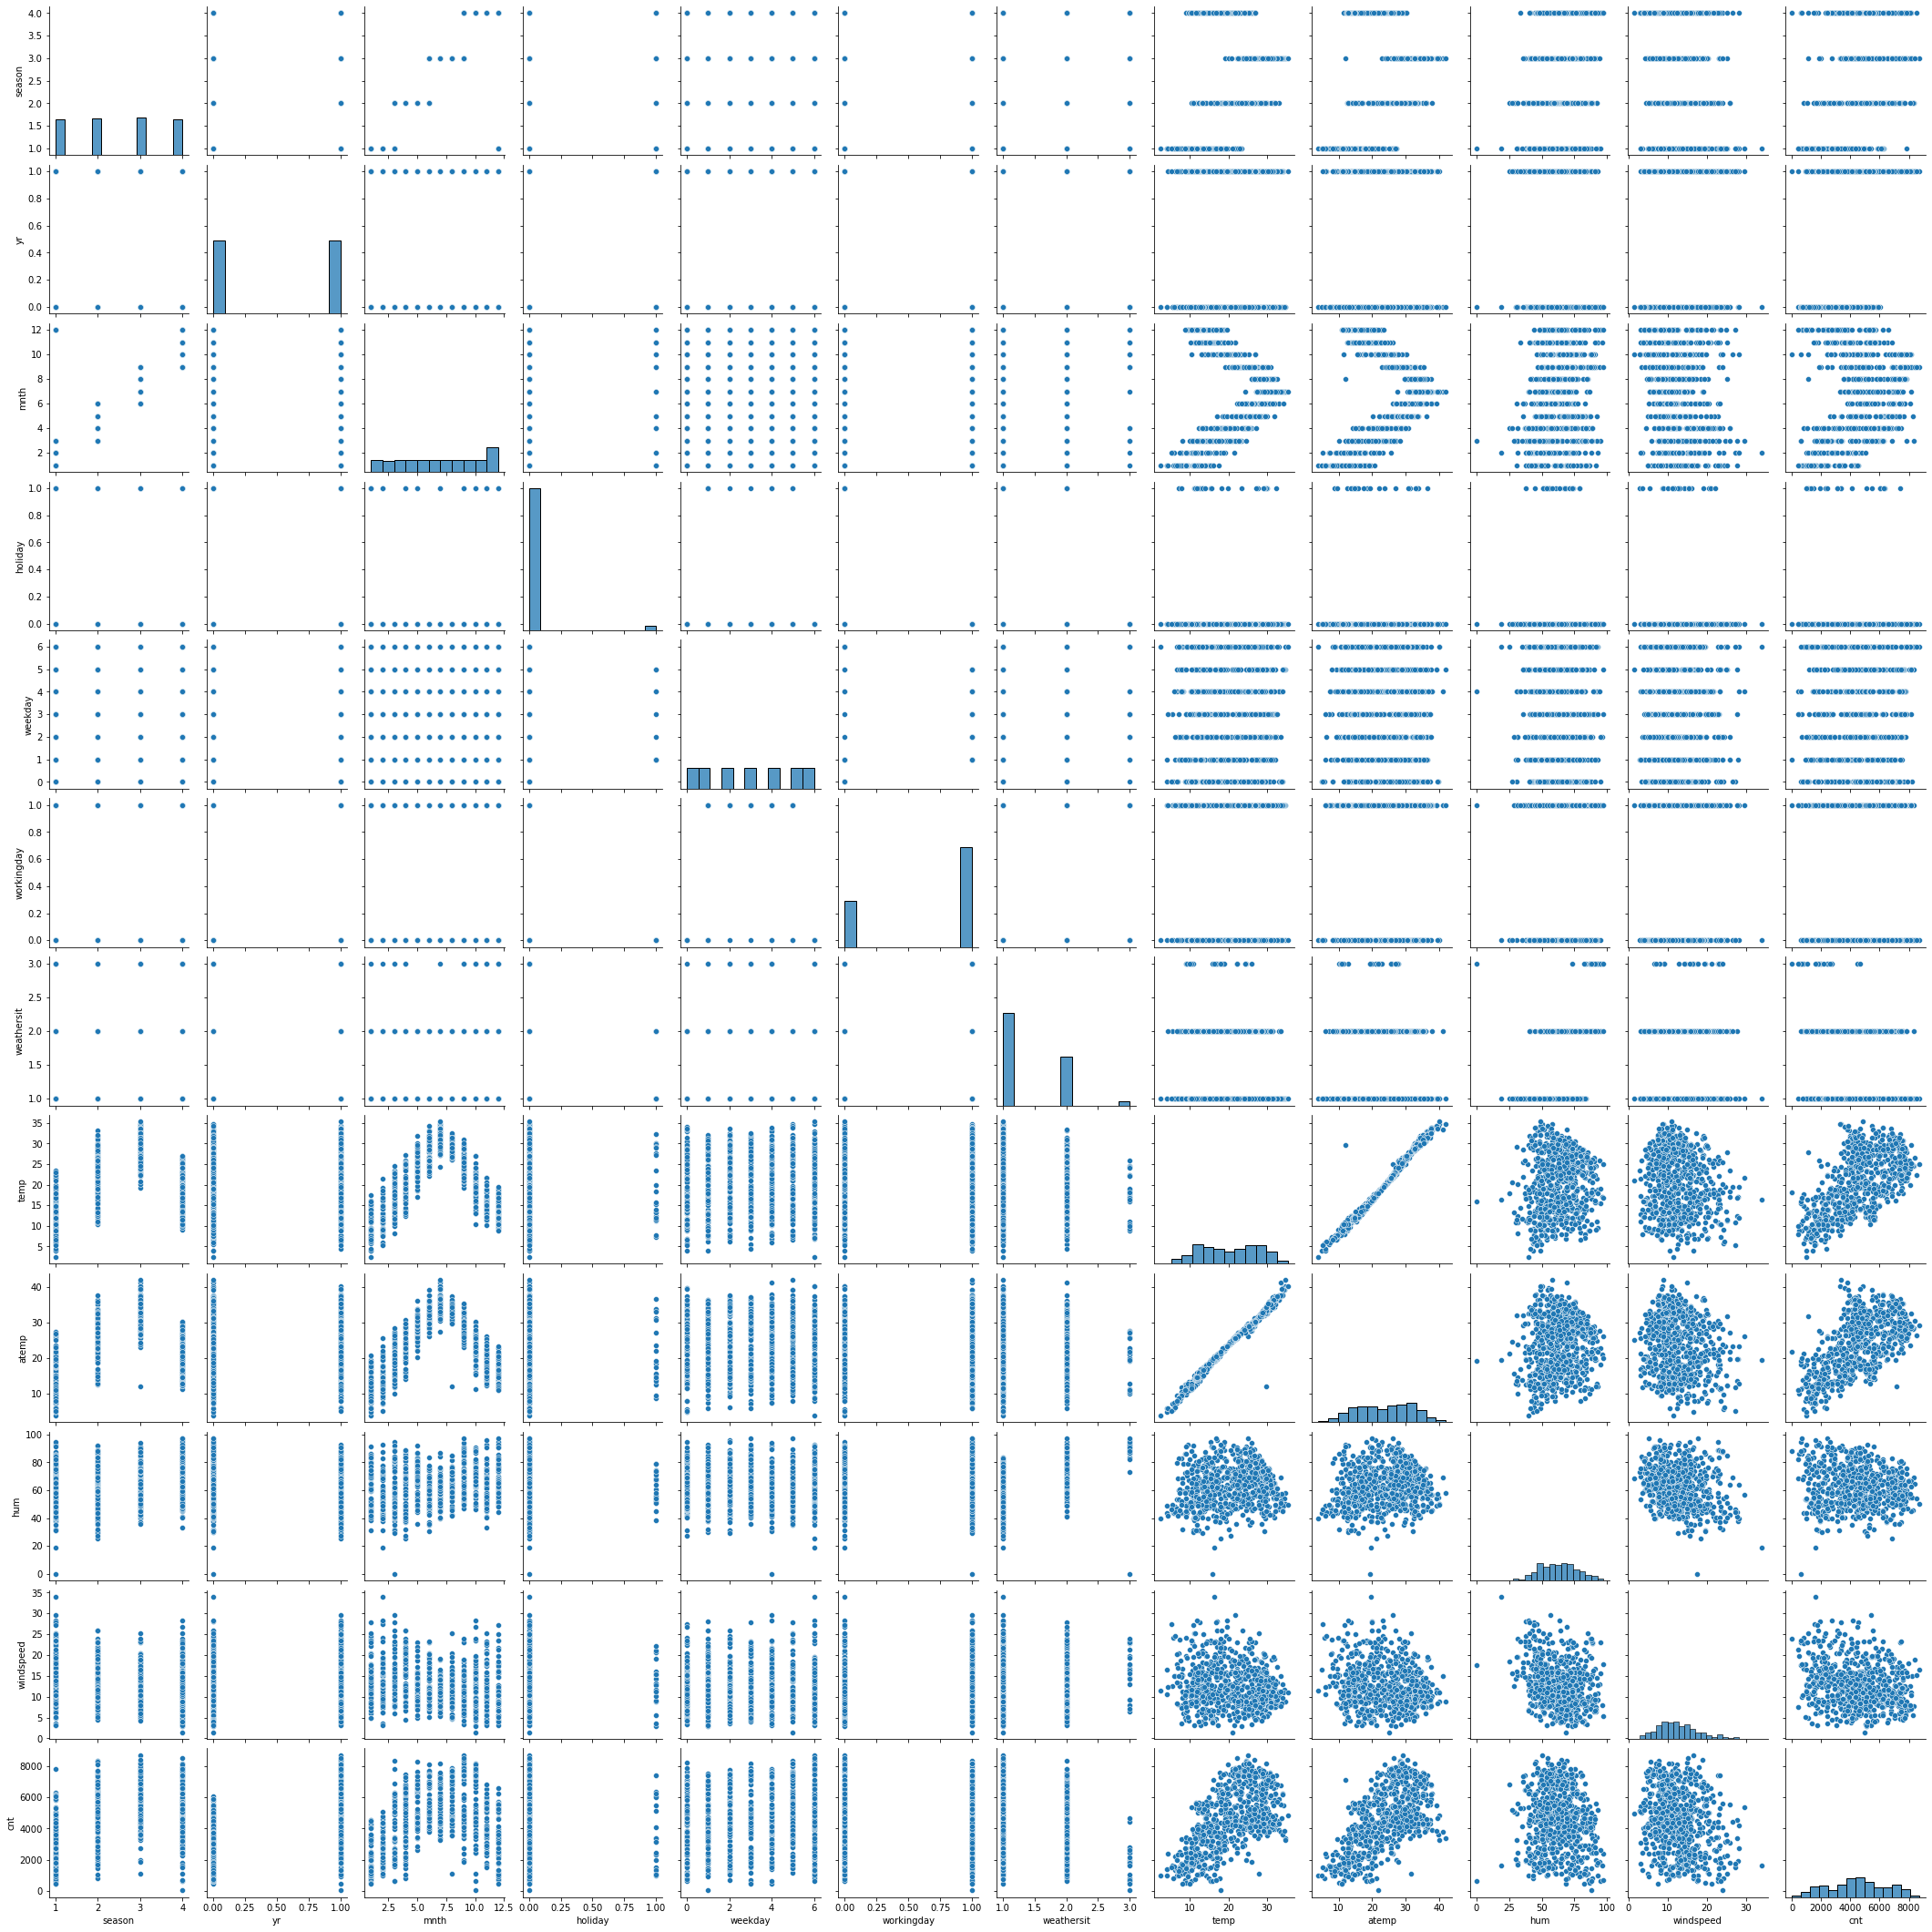

In [21]:
#Plotting paiplot to find the identifying patterns between columns

sns.pairplot(df_new)
plt.show()

#### Comment

- The plot between **"cnt"** and other columns show that,  most of the columns are linearly related to **"cnt"**.

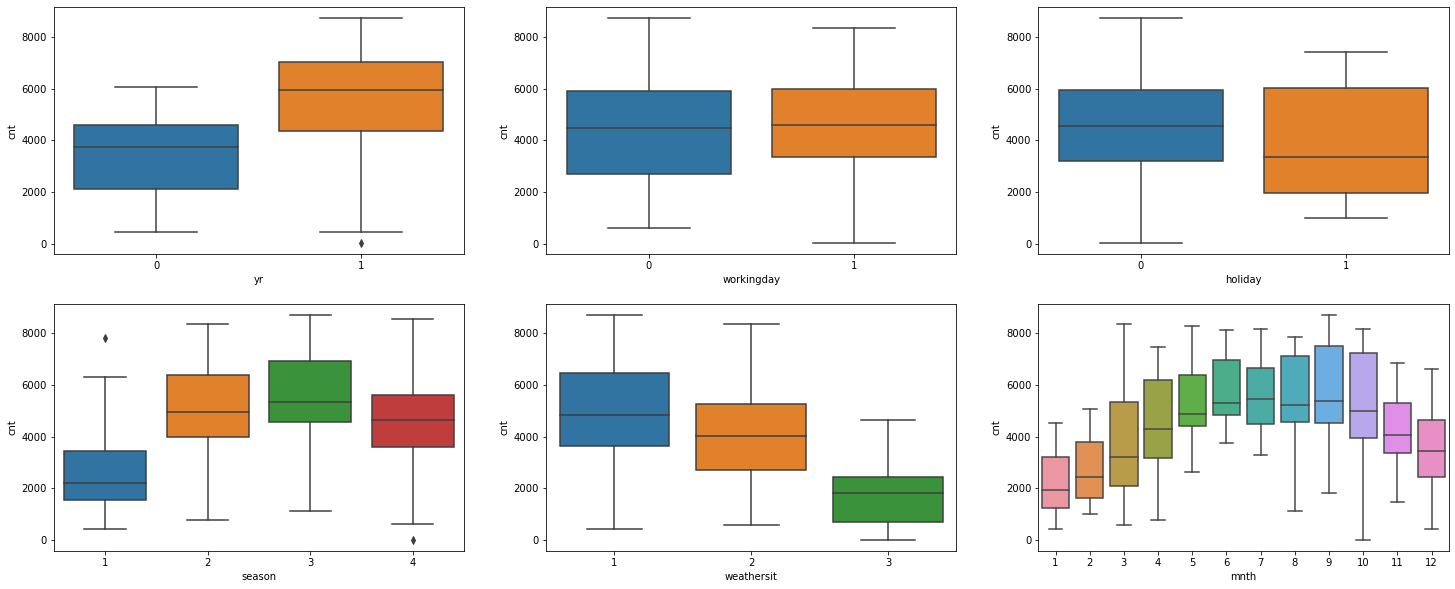

In [22]:
#Plotting a boxplot for categorical variables vs target variable 'cnt' 

plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=df_new)
plt.subplot(2,3,2)
sns.boxplot(x='workingday', y='cnt', data=df_new)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=df_new)
plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=df_new)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data=df_new)
plt.subplot(2,3,6)
sns.boxplot(x='mnth', y='cnt', data=df_new)
plt.show()

#### Comment

- yr : year 2019 has most number of customers interested in rent bikes
- season : during season 2 & 3 we can observe people are more interested in renting bike
- weathersit : 1- Clear, Few clouds, Partly cloudy, Partly cloudy : shows that people like to rent bikes at clear weather

In [23]:
cat_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]  #categorical columns
num_col = ["temp","atemp","hum","windspeed","cnt"]  #numerical columns

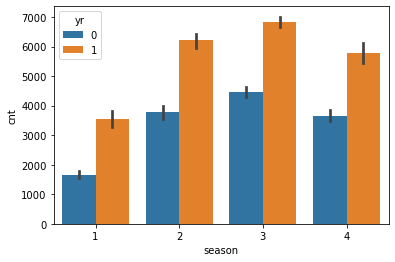

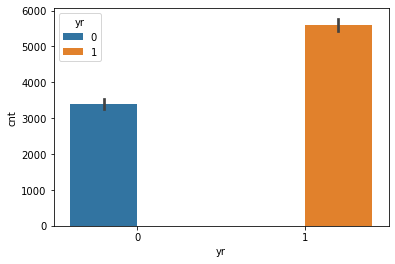

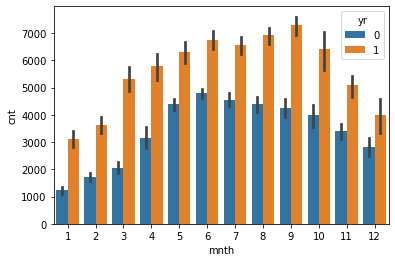

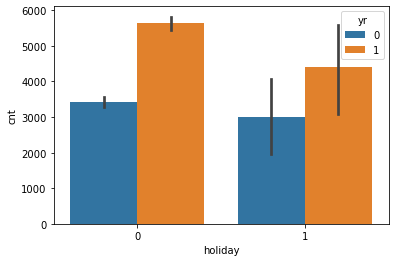

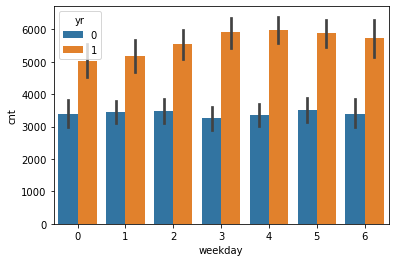

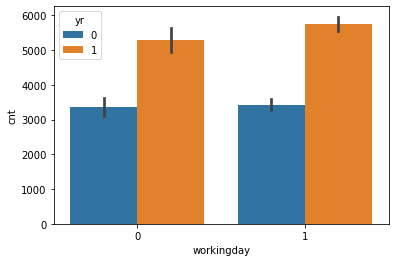

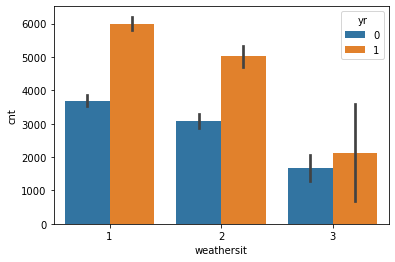

In [24]:
#plotting barplot for categorical columns 

for i in cat_col:
    sns.barplot(x=i, y="cnt", data=df_new, hue='yr')
    plt.show()

#### Comment

- In general the count value is on a higher side for yr 1.
- The middle months are when the **cnt** is high.
- The **cnt** decreases for weathersit1 to weathersit3

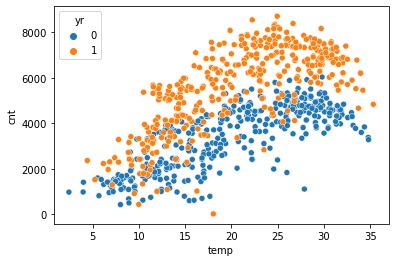

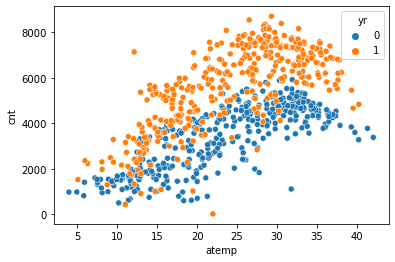

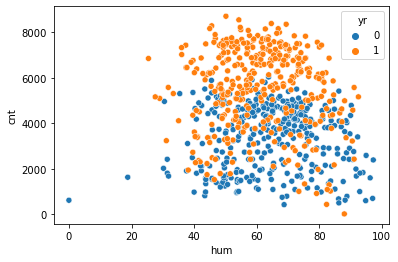

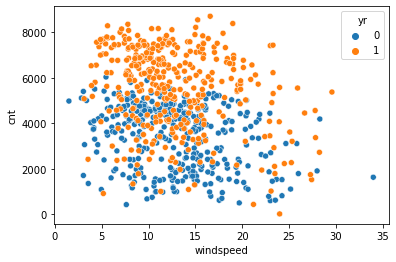

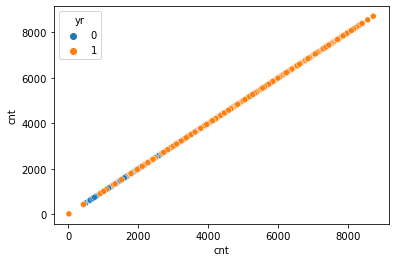

In [28]:
#Plotting scatter plot for numerical columns

for j in num_col:
    sns.scatterplot(x=j, y="cnt", data=df_new, hue="yr")
    plt.show()

#### Comment

- The count value is more comparatively for yr 1

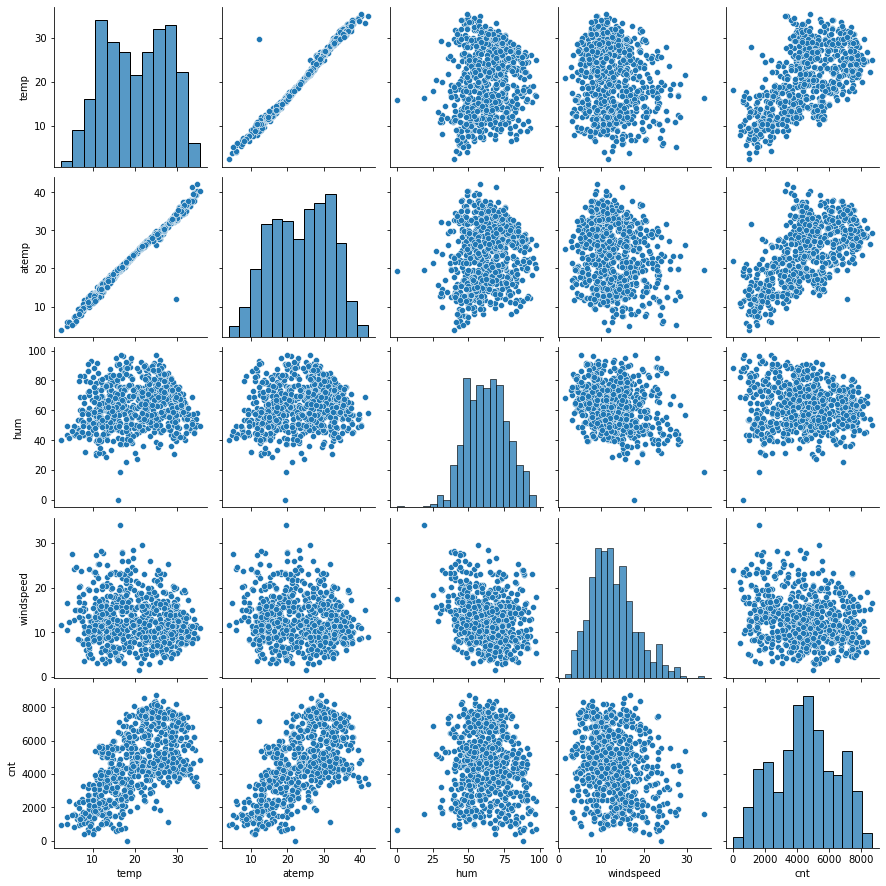

In [27]:
#Plotting pairplot for numerical columns

sns.pairplot(data=df_new, vars=num_col)
plt.show()

#### Comment

- There is a high correlation betweeen **temp** & **atemp**
- There are no significant relation between other numerical columns

### Creating dummy variables

Create Dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- We will have to convert them into 'category' data types and then perform encoding

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [31]:
# Converting to 'category' data type

df_new['season']=df_new['season'].astype('category')
df_new['weathersit']=df_new['weathersit'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [34]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### Comment

The above code performs the following operation:
- Create Dummy variable
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created

In [35]:
df_new.shape

(730, 30)

### Spliting the data into training set and test set

In [61]:
from sklearn.model_selection import train_test_split  #import necessary package

np.random.seed(0)  #reset the seed generator
df_train, df_test = train_test_split(df_new, train_size = 
                                     0.7, test_size = 0.3, random_state = 100)  #this code sets the random state, train and test size

In [62]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling features

In [63]:
from sklearn.preprocessing import MinMaxScaler  #import necessary package

In [64]:
scaler = MinMaxScaler()  #create an instance of MinMaxScaler

In [65]:
df_train.head()  #values before scaling 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [66]:
num_col  #numerical columns to rescale

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [67]:
df_train[num_col] = scaler.fit_transform(df_train[num_col])  #scale the numerical columns

In [68]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [69]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Model
    

In [70]:
#Divide between target and indepent variables

y_train = df_train.pop('cnt')
X_train = df_train

In [71]:
from sklearn.linear_model import LinearRegression  #importing necessary packages

In [72]:
lm = LinearRegression()  #create an instance 
lm.fit(X_train, y_train)  #train the model

LinearRegression()

In [73]:
from sklearn.feature_selection import RFE  #importing necessary packages

In [74]:
rfe = RFE(lm,n_features_to_select= 15)             #run RFE
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  #list the columns along with their rfe ranking

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', False, 13),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 3),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 4),
 ('mnth_7', False, 9),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', False, 8),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 6),
 ('weathersit_2', False, 14),
 ('weathersit_3', True, 1)]

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_4',
       'mnth_5', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_3'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_2', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [78]:
#Create dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Linear Model using STATS_MODEL OLS

In [79]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor  #importing necessary packages

#Dataframe with names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.99
3,temp,7.17
5,windspeed,3.54


#### Comment

- **inf** means the r^2 value is 1, therefore giving infinity. It means that the variable can be completely described using other variables

In [80]:
import statsmodels.api as sm

#Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

#Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [81]:
#Check the parameters obtained

lr1.params

const           0.272990
yr              0.228277
holiday        -0.073530
workingday      0.024315
temp            0.597885
hum            -0.285878
windspeed      -0.180337
season_4        0.127211
mnth_5          0.076734
mnth_9          0.088260
weekday_1      -0.014908
weekday_2      -0.017358
weekday_3      -0.003123
weekday_4      -0.008281
weekday_5      -0.005545
weathersit_3   -0.194693
dtype: float64

In [82]:
#Summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.01e-171
Time:                        01:17:20   Log-Likelihood:                 469.59
No. Observations:                 510   AIC:                            -909.2
Df Residuals:                     495   BIC:                            -845.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2730      0.028      9.606   

#### Remove column weekday_2 based on its high p-value and high VIF

In [83]:
X_train_new = X_train_rfe.drop(["weekday_3"], axis = 1)

In [84]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.99
3,temp,7.17
2,workingday,6.46
5,windspeed,3.54
9,weekday_1,2.08
0,yr,2.03
11,weekday_4,1.85
10,weekday_2,1.84
12,weekday_5,1.82
6,season_4,1.54


In [85]:
#Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

#Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [86]:
#Check the parameters obtained

lr2.params

const           0.272990
yr              0.228277
holiday        -0.076654
workingday      0.021191
temp            0.597885
hum            -0.285878
windspeed      -0.180337
season_4        0.127211
mnth_5          0.076734
mnth_9          0.088260
weekday_1      -0.011784
weekday_2      -0.014234
weekday_4      -0.005158
weekday_5      -0.002422
weathersit_3   -0.194693
dtype: float64

In [87]:
#Summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.01e-171
Time:                        01:19:32   Log-Likelihood:                 469.59
No. Observations:                 510   AIC:                            -909.2
Df Residuals:                     495   BIC:                            -845.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2730      0.028      9.606   

#### Remove column workingday based on its high p-value and high VIF

In [89]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [90]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.51
2,temp,7.13
4,windspeed,3.52
0,yr,2.03
5,season_4,1.54
8,weekday_1,1.44
9,weekday_2,1.28
10,weekday_4,1.27
11,weekday_5,1.27
6,mnth_5,1.19


In [91]:
#Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

#Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [92]:
lr3.params

const           0.279890
yr              0.228508
holiday        -0.097529
temp            0.598322
hum            -0.285211
windspeed      -0.181619
season_4        0.126550
mnth_5          0.077894
mnth_9          0.089027
weekday_1       0.002051
weekday_2      -0.000419
weekday_4       0.008615
weekday_5       0.011450
weathersit_3   -0.191666
dtype: float64

In [93]:
#Summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.12e-172
Time:                        01:23:06   Log-Likelihood:                 468.33
No. Observations:                 510   AIC:                            -908.7
Df Residuals:                     496   BIC:                            -849.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2799      0.028      9.955   

#### Remove column hum based on its high VIF

In [94]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [95]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.94
3,windspeed,2.96
0,yr,2.02
7,weekday_1,1.41
4,season_4,1.28
8,weekday_2,1.27
9,weekday_4,1.26
10,weekday_5,1.25
5,mnth_5,1.17
6,mnth_9,1.17


In [96]:
#Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

#Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [97]:
lr4.params

const           0.094490
yr              0.234905
holiday        -0.090945
temp            0.575984
windspeed      -0.125333
season_4        0.109207
mnth_5          0.052355
mnth_9          0.071788
weekday_1      -0.001563
weekday_2      -0.000748
weekday_4       0.013719
weekday_5       0.011568
weathersit_3   -0.253235
dtype: float64

In [98]:
#Summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.69e-159
Time:                        01:24:42   Log-Likelihood:                 434.10
No. Observations:                 510   AIC:                            -842.2
Df Residuals:                     497   BIC:                            -787.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      5.039   

#### Remove column weekday_2 based on its high p-value

In [99]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [100]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.78
3,windspeed,2.92
0,yr,2.02
7,weekday_1,1.35
4,season_4,1.27
8,weekday_4,1.21
9,weekday_5,1.20
6,mnth_9,1.17
5,mnth_5,1.16
1,holiday,1.13


In [101]:
#Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

#Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [102]:
lr5.params

const           0.094349
yr              0.234903
holiday        -0.090949
temp            0.575940
windspeed      -0.125333
season_4        0.109204
mnth_5          0.052324
mnth_9          0.071794
weekday_1      -0.001396
weekday_4       0.013885
weekday_5       0.011737
weathersit_3   -0.253175
dtype: float64

In [103]:
#Summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.31e-160
Time:                        01:26:31   Log-Likelihood:                 434.10
No. Observations:                 510   AIC:                            -844.2
Df Residuals:                     498   BIC:                            -793.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0943      0.019      5.091   

#### Remove column weekday1 based on its high p-value

In [104]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [105]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.71
3,windspeed,2.89
0,yr,2.00
4,season_4,1.27
6,mnth_9,1.17
5,mnth_5,1.16
7,weekday_4,1.16
8,weekday_5,1.16
9,weathersit_3,1.07
1,holiday,1.03


In [106]:
#Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

#Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [107]:
lr6.params

const           0.094081
yr              0.234848
holiday        -0.091826
temp            0.575970
windspeed      -0.125285
season_4        0.109197
mnth_5          0.052349
mnth_9          0.071814
weekday_4       0.014172
weekday_5       0.012012
weathersit_3   -0.253166
dtype: float64

In [108]:
#Summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.25e-161
Time:                        01:28:22   Log-Likelihood:                 434.09
No. Observations:                 510   AIC:                            -846.2
Df Residuals:                     499   BIC:                            -799.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0941      0.018      5.135   

#### Remove column weekday5 based on its high p-value

In [109]:
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)

In [110]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.87
0,yr,2.00
4,season_4,1.27
6,mnth_9,1.17
5,mnth_5,1.16
7,weekday_4,1.14
8,weathersit_3,1.06
1,holiday,1.03


In [114]:
#Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

#Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [115]:
lr7.params

const           0.096140
yr              0.234703
holiday        -0.092401
temp            0.576036
windspeed      -0.125617
season_4        0.108837
mnth_5          0.052294
mnth_9          0.071804
weekday_4       0.012423
weathersit_3   -0.254531
dtype: float64

In [116]:
#Summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.11e-162
Time:                        01:31:30   Log-Likelihood:                 433.72
No. Observations:                 510   AIC:                            -847.4
Df Residuals:                     500   BIC:                            -805.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0961      0.018      5.295   

#### Remove column weekday4 based on its high p-value

In [117]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [118]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.59
3,windspeed,2.85
0,yr,2.00
4,season_4,1.27
6,mnth_9,1.17
5,mnth_5,1.16
7,weathersit_3,1.06
1,holiday,1.03


In [119]:
#Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

#Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [120]:
lr8.params

const           0.097921
yr              0.234668
holiday        -0.092144
temp            0.575942
windspeed      -0.125798
season_4        0.108635
mnth_5          0.052090
mnth_9          0.072261
weathersit_3   -0.253650
dtype: float64

In [121]:
#Summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.91e-163
Time:                        01:32:55   Log-Likelihood:                 433.29
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     501   BIC:                            -810.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0979      0.018      5.426   

## Final Model parameters

#### Model coefficients

- const           0.097921
- yr              0.234668
- holiday        -0.092144
- temp            0.575942
- windspeed      -0.125798
- season_4        0.108635
- mnth_5          0.052090
- mnth_9          0.072261
- weathersit_3   -0.253650

#### Comment

- From our model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**


#### Points to be noted

- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 231.9
- Prob (F-statistic): 4.91e-163
- The F-Statistics value of 232 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### Residual analysis

In [122]:
y_train_pred = lr8.predict(X_train_lm8)

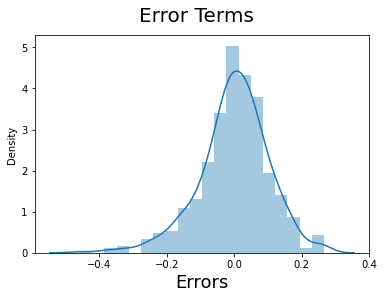

In [125]:
resi = y_train-y_train_pred

#Plotting the distploy of the error terms
fig = plt.figure()
sns.distplot((resi), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  #Title
plt.xlabel('Errors', fontsize = 18)                         #X-label
plt.show()

#### Comment

- Error terms are normally distributed with mean zero (not X, Y)

### Multicollinearity analysis

In [126]:
#Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.59
3,windspeed,2.85
0,yr,2.00
4,season_4,1.27
6,mnth_9,1.17
5,mnth_5,1.16
7,weathersit_3,1.06
1,holiday,1.03


#### Comment

- There is No Multicollinearity between the predictor variables (as VIF < 5)

## Making Prediction using our model

In [127]:
num_col

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [128]:
#Scale the numerical data present in test set

df_test[num_col] = scaler.transform(df_test[num_col])

In [129]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
#Split between target variable and independent variable

y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
col1=X_train_new.columns
print(col1)

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_4', 'mnth_5', 'mnth_9',
       'weathersit_3'],
      dtype='object')


In [134]:
#Select the variables that were part of final model.

X_test=X_test[col1]

In [135]:
#Add constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_4      219 non-null    uint8  
 6   mnth_5        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [136]:
#Making predictions using our final model (lr8)

y_pred = lr8.predict(X_test_lm8)

## Model Evaluation

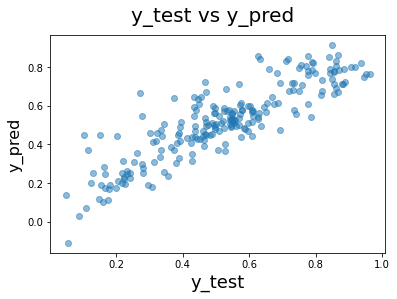

In [137]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R2 score

In [138]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7592062038287127

#### Adjusted R2 score

In [139]:
r2 = 0.7592062038287127

In [140]:
#n is number of rows in X
n = X_test.shape[0]


#Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

#We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7500331068317113

# Result

- Train R^2 :0.787
- Train Adjusted R^2 :0.784 
- Test R^2 :0.759
- Test Adjusted R^2 :0.750 
- This seems to be a really good model that can very well 'Generalize' various datasets.

# Conclusion

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.575942’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.575942 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.253650’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.253650 units.
- **Year (yr)** - A coefficient value of ‘0.234668’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.234668 units. 

The Equation for this model is approximated to be:
- **cnt** = 0.097921 + (yr**X**0.234668) + (holiday**X**-0.092144) + (temp**X**0.575942 + (windspeed**X**-0.125798) + (season_4**X**0.108635) + (mnth_5**X**0.052090) + (mnth_9**X**0.072261) + (weathersit_3**X**-0.253650)

#### Datadict for used variables

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- windspeed: wind speed
- cnt: count of total rental bikes including both casual and registered

**********************************************EOF**************************************